# Rural India and Social Mobility: An investigation of the impact of infrastructure development and political governance on upward mobility

In [1]:
#Access to Clean Cooking Energy and Electricity: Survey of States in India (ACCESS: 
#https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0NV9LF&version=1.4
import requests
import pandas as pd
import numpy as np

### Import all data

The Population Censuses of 1991, 2001, 2011, which describe basic demographic characteristics (Primary Census Abstract) and local amenities (Town/Village Directories).


• The Economic Censuses of 1990, 1998, 2005, and 2013, which are full enumerations of all non-farm establishments, including informal firms, service sector firms, and publicly-owned firms. 


• The Socioeconomic and Caste Census, an enumeration of assets and additional characteristics for all households in India. 

• Administrative data from government programs, like the national rural road program PMGSY. 

• Remote sensing data on night lights and forest cover. 

• Legislative assembly election results, which are linked to constituency-level data on all of the above. 

• Data from politician affidavits, including criminal charges, assets, liabilities, and other characteristics.


In [2]:
#import population and economic consensus, ancillary, forest cover, night lights, affidavit,

In [3]:
#import population data
data_folder="../../data/shrug/"
pop_91 = pd.read_csv(data_folder+"shrug_pc91.csv")
pop_01=pd.read_csv(data_folder+"shrug_pc01.csv")
pop_11=pd.read_csv(data_folder+"shrug_pc11.csv")

In [4]:
#economic consensus
ec_data=pd.read_csv(data_folder+"shrug_ec.csv")

In [5]:
#import socioeconomic and caste census data
secc_data=pd.read_csv(data_folder+"shrug_ancillary.csv")
secc_data.head()

C:\Users\isimr\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,shrid,secc_rural_cons_pc,secc_inc_cultiv_share,tdist_10,tdist_50,tdist_100,tdist_500,thiessen_polygon,road_award_date_new,road_award_date_upg,...,road_sanc_year_new,road_sanc_year_upg,road_length_new,road_length_upg,road_cost_new,road_cost_upg,road_cost_sanc_new,road_cost_sanc_upg,road_cost_state_new,road_cost_state_upg
0,11-01-000001,NaN,NaN,23.47841,69.29648,120.32990,120.32990,NaN,24oct2006,NaN,...,2004.0,NaN,5.5,NaN,170.1,NaN,181.71,NaN,0.0,NaN
1,11-01-000002,14700.170,0.013158,21.89800,68.30957,119.88600,119.88600,NaN,24oct2006,NaN,...,2004.0,NaN,5.5,NaN,170.1,NaN,181.71,NaN,0.0,NaN
2,11-01-000005,9512.117,0.023762,13.98114,58.10366,108.18570,108.18570,NaN,24oct2006,NaN,...,2004.0,NaN,5.5,NaN,170.1,NaN,181.71,NaN,0.0,NaN
3,11-01-000006,11173.260,0.149701,10.42457,53.62597,103.71920,103.71920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-01-000007,12800.960,0.005882,10.56490,50.56648,99.41351,99.41351,NaN,20apr2011,NaN,...,2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import csv
dataod=csv.reader(data_folder+'/ICPSR_22626/DS0002/22626-0002-Data.tsv',delimiter='\t')
dataod

In [24]:
HDIS_05=pd.read_csv(data_folder+'/ICPSR_22626/DS0002/22626-0002-Data.csv',low_memory=False)
HDIS_12=pd.read_csv(data_folder+'/ICPSR_36151/DS0002/36151-0002-Data.csv',low_memory=False)
HDIS_05.head()


,CASEID,STATEID,DISTID,PSUID,HHID,HHSPLITID,IDHH,IDPSU,STATEID2,DISTNAME,...,MH1AC,MH2BC,MH2BF,MH2AC,MH18BC,MH18BF,MH18AC,MH19BC,MH19BF,MH19AC
0,10201010,1,2,1,1,0,10201010,10201,101,102,...,13,889,6,13,,,,,,
1,10201020,1,2,1,2,0,10201020,10201,101,102,...,19,1191,6,20,,,,,,
2,10201030,1,2,1,3,0,10201030,10201,101,102,...,18,1061,6,19,,,,,,
3,10201040,1,2,1,4,0,10201040,10201,101,102,...,20,1036,6,21,,,,,,
4,10201050,1,2,1,5,0,10201050,10201,101,102,...,16,1125,3,16,,,,,,


In [ ]:
for i in secc_data.columns:
    print(i)

In [5]:
(pop_01).columns

Index(['shrid', 'pc01_pca_tot_p', 'pc01_pca_tot_p_r', 'pc01_pca_tot_p_u',
       'pc01_pca_p_sc', 'pc01_pca_no_hh', 'pc01_pca_p_st', 'pc01_pca_p_lit',
       'pc01_vd_p_sch', 'pc01_vd_m_sch', 'pc01_vd_s_sch', 'pc01_vd_s_s_sch',
       'pc01_vd_college', 'pc01_vd_tar_road', 'pc01_vd_dirt_road',
       'pc01_vd_area', 'pc01_vd_power_dom', 'pc01_vd_power_agr',
       'pc01_vd_power_all', 'pc01_td_p_sch', 'pc01_td_m_sch', 'pc01_td_s_sch',
       'pc01_td_college', 'pc01_td_s_s_sch', 'pc01_td_area'],
      dtype='object')

In [6]:
pop_11.columns

Index(['shrid', 'pc11_pca_tot_p', 'pc11_pca_tot_p_r', 'pc11_pca_tot_p_u',
       'pc11_pca_no_hh', 'pc11_pca_p_sc', 'pc11_pca_p_st', 'pc11_pca_p_lit',
       'pc11_vd_p_sch', 'pc11_vd_m_sch', 'pc11_vd_s_sch', 'pc11_vd_s_s_sch',
       'pc11_vd_college', 'pc11_vd_tar_road', 'pc11_vd_area',
       'pc11_vd_power_dom_sum', 'pc11_vd_power_dom_win',
       'pc11_vd_power_agr_sum', 'pc11_vd_power_agr_win',
       'pc11_vd_power_com_sum', 'pc11_vd_power_com_win',
       'pc11_vd_power_all_sum', 'pc11_vd_power_all_win', 'pc11_vd_power_dom',
       'pc11_vd_power_agr', 'pc11_vd_power_all', 'pc11_td_p_sch',
       'pc11_td_m_sch', 'pc11_td_s_sch', 'pc11_td_college', 'pc11_td_s_s_sch',
       'pc11_td_area'],
      dtype='object')

In [7]:
ec_data.columns

Index(['shrid', 'ec90_emp_all', 'ec98_emp_all', 'ec05_emp_all',
       'ec13_emp_all'],
      dtype='object')

In [12]:
ec_data.head()

,shrid,ec90_emp_all,ec98_emp_all,ec05_emp_all,ec13_emp_all
0,11-01-000001,NaN,NaN,NaN,3.0
1,11-01-000002,NaN,NaN,44.0,49.0
2,11-01-000005,NaN,NaN,22.0,82.0
3,11-01-000006,NaN,NaN,5.0,43.0
4,11-01-000007,NaN,NaN,10.0,47.0


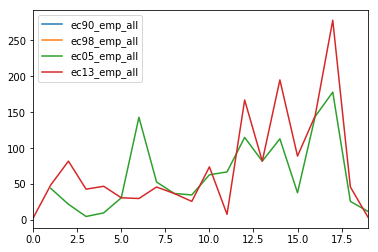

In [11]:
ec_data[:20].plot();

In [ ]:
import matplotlib as plt


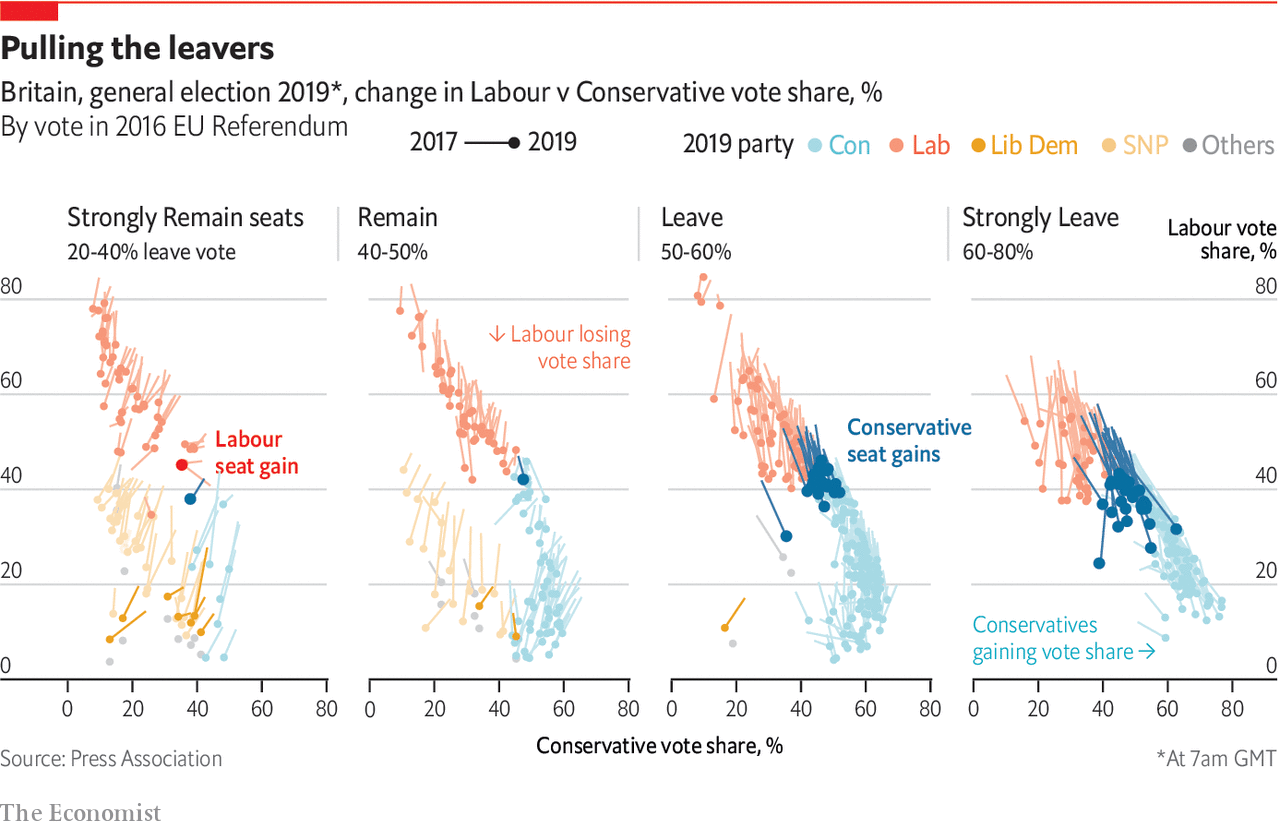

In [35]:
r04_dict={"Coding":[1,2,3,4,5,6,7,8,9,10,11,12],"Relation":["Head","Spouse","Child","Child-in-Law","Grandchild","Parent","Sibling","ParentinLaw","NephewoNeice","Sibling-in-law","Other","Servant"]}

In [36]:
R04_mapping=pd.DataFrame.from_dict(r04_dict)

In [37]:
R04_mapping

,Coding,Relation
0,1,Head
1,2,Spouse
2,3,Child
3,4,Child-in-Law
4,5,Grandchild
5,6,Parent
6,7,Sibling
7,8,ParentinLaw
8,9,NephewoNeice
9,10,Sibling-in-law


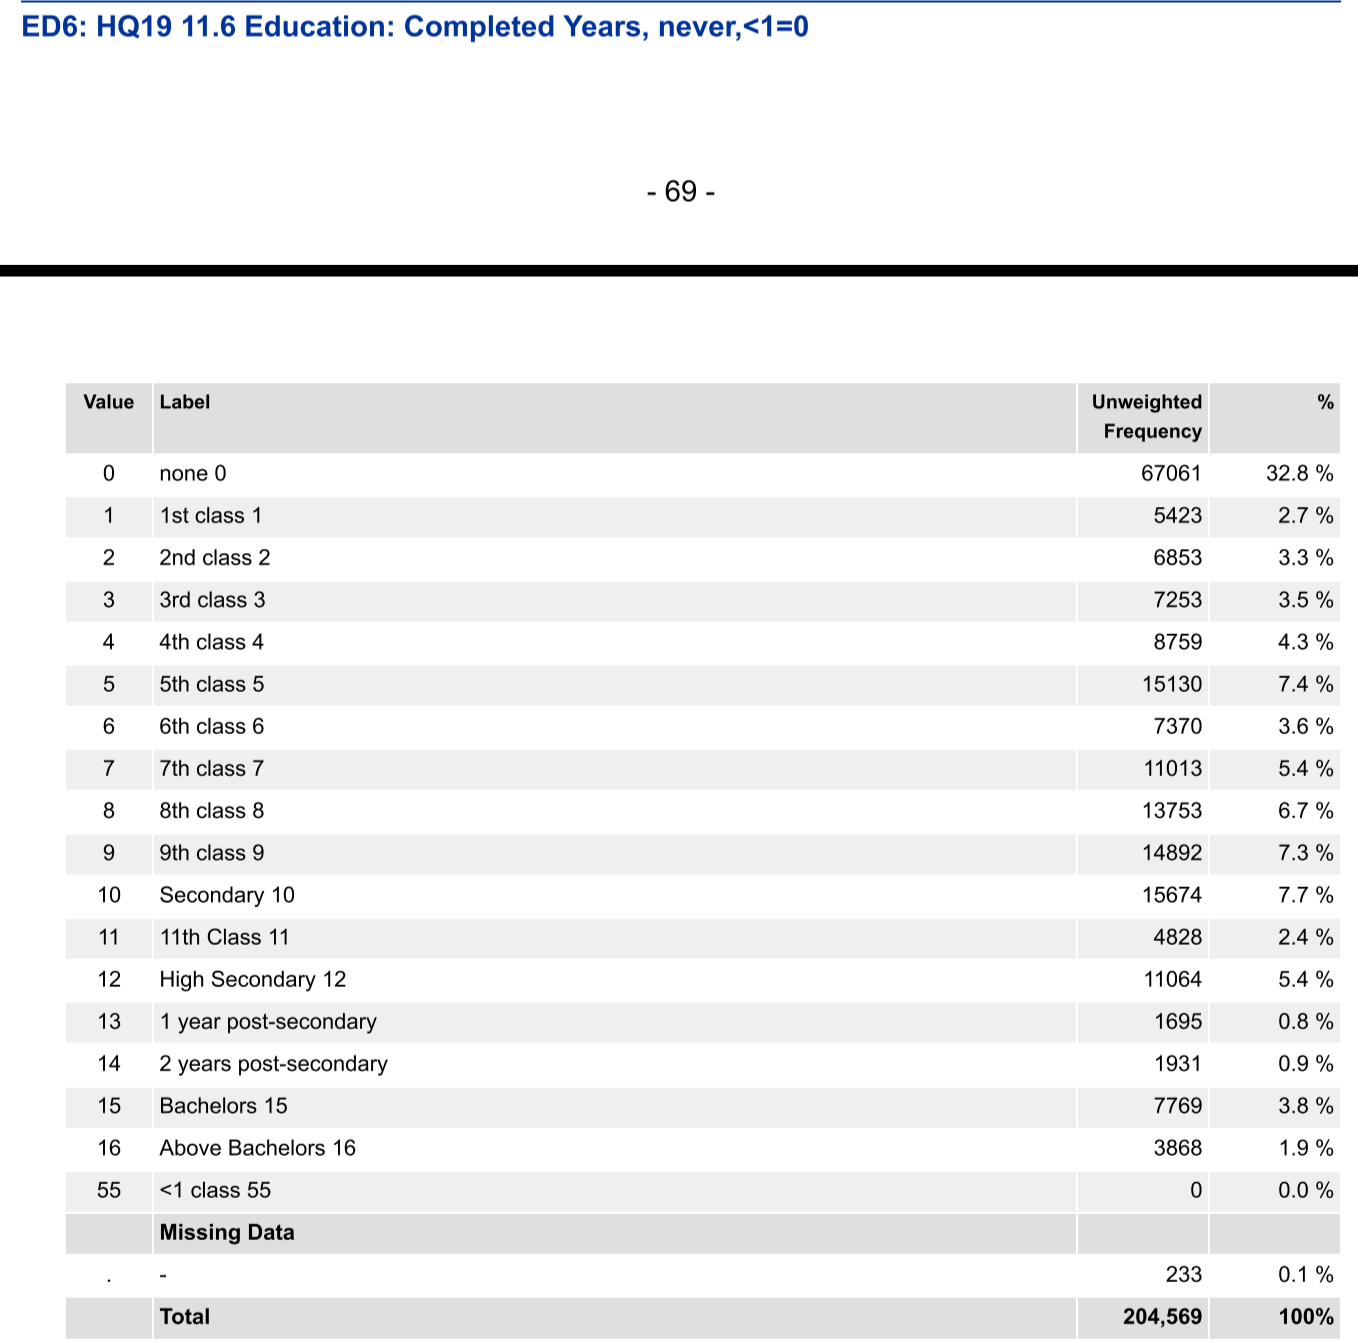

In [41]:
ihds_2011_path= "C:/Users/isimr/git/data/shrug/ICPSR_36151/DS0001/"
ihds_2005_path="C:/Users/isimr/git/data/shrug/ICPSR_22626/DS0001/"
ihds_2011=pd.read_csv(ihds_2011_path+"36151-0001-Data.tsv.csv",low_memory=False)
ihds_2005=pd.read_csv(ihds_2005_path+"22626-0001-Data.tsv.csv",low_memory=False)
